<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h1>A2: Analyzing Customer Churn</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
Team 11<br>
Asamoah, Barbara<br>
Brandares, Eunice<br>
Pina, Henrique<br>
Polonio, Linette<br>
Cantillo, Thaly Margarita Ramirez
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

## 1 Problem statement and Understanding

The company is experiencing high customer churn rate of <b><span style="color:red">26%</b></span>, which is a significant problem for the business, leading to a loss of revenue, increased marketing costs, and decreased customer loyalty. 

The company employed Team 11 to understand and analyze the situations stand and analyze the situations. The team needs to give recommendations and help build a model predicting churn, helping the business to identify the relevant parameters to impact churn.

## 2 Results and Business Recommendations

The approach taken by the team to address this issue was to develop a statistical model to explain why customers churn. The team did various prediction models such as Logistic Regression Model, Decision Tree Model, and Random Forest (amongst other models). This resulted in various predictive powers.

The Tuned Gradient Boosted Machines (GBM) produced the highest predictive power. The Tuned GBM is the best model with an AUC of 0.8865 and a train-test gap of 0.125, with an <b><span style="color:seagreen"> accuracy of 93%</b></span>. The model had five main factors that explain what can lead a customer to stop doing business with the company. These factors are the length of the contract, type of internet service, total charges, tenure, and the customers’ estimated salaries.

The analysts recommend that the business focus on <b><u>retention strategies</b></u>, especially for customers with the following profile: medium-level estimated salary individuals that are expected to remain with the company for maximum one year with a month-to-month contract, paying up to $1,460 USD with a Fiber Optic technology. These customers have a higher risk of churning compared to those with other profiles. The customers with the following profile are more preferred, since they are most likely to stay with the company: a tenure of more than 36 months and have DSL internet with the company.

To better understand the reasons behind the churn of risky customers, it is <b><u>recommended to conduct a survey targeting customers who have already churned</b></u>. The survey should be designed to appeal to these customers by offering them discounts and rewards that can be used within the company. This will not only provide valuable insights into the reasons for churn, but also provide an opportunity to win back lost customers. While conducting the survey is out of scope, it is highly recommended to consider this approach to better understand and address customer churn.

One suggestion to reduce customer churn is to <b><u>introduce package deals that offer various promotions</b></u> such as discounted rates when customers sign up for both phone and internet services. Additionally, the company could consider offering free upgrades to customers who have been with the company for over 12 months. This would address the finding in the analysis that many churners had been with the company for less than 12 months. By providing such packages, the company can encourage customers to stay longer and feel more valued. Building a strong relationship with customers should be a key priority for the company.

## 3 Assumptions and Limitations

The analysis assumes that the provided data pertains to the US market. Another assumption is that the company does not currently offer loyalty programs or attractive packages to retain customers for extended periods beyond one year.

One limitation of the analysis is the Tenure feature, as there is no information provided on why customers are churning within the first 12 months of using the company's services. Further investigation into the underlying reasons for this high churn rate could provide valuable insights for improving customer retention strategies.

## 4 Exploratory Data Analysis (EDA)

In [1]:
# Set up environment with libraries & data

##############################################################################
# Import libraries
!pip install pydotplus
import pandas as pd                     # data sceince essentials
import matplotlib.pyplot as plt         # essential graphical output
import seaborn as sns                   # enhanced visualizations
import numpy as np                      # mathematical essentials
from tqdm.notebook import tqdm          # progress bars
import time                             # time essentials
import itertools

t0 = time.time()                        # start time of notebook


from sklearn.feature_selection import SelectFromModel   # feature selection
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.linear_model import LogisticRegression     # logistic regression

                # logistic regression

from sklearn import metrics                             # metrics
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.metrics import classification_report       # classification report
from sklearn.metrics import make_scorer                 # customizable scorer



from sklearn.cluster import KMeans                      # KMeans for segmentation

from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.preprocessing import MinMaxScaler          # minmax scaler
from sklearn.preprocessing import RobustScaler          # robust scaler

from sklearn.neighbors import KNeighborsClassifier      # KNN for classification

from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import export_graphviz                # exports graphics

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

from six import StringIO                                # saves objects in memory
from IPython.display import Image                       # displays on frontend
import pydotplus                                        # interprets dot objects

from imblearn.over_sampling import SMOTE                # oversampling
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# reading the file into Python
A2_data = pd.read_csv('./A2.csv')
A2_data.rename(columns={A2_data.columns[0]:"Index"}, inplace = True)
A2_data

,Index,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
0,0,Female,0.0,Yes,72.0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,7679.65,No,Germany,602.0,Klein,45038.29,108.30,6519-ZHPXP,Yes,Bank transfer (automatic),108.30
1,1,Male,0.0,Yes,30.0,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,1441.95,No,Germany,776.0,Lung,89893.60,49.90,1958-RNRKS,No,Electronic check,49.90
2,2,Male,0.0,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,1838.15,No,Germany,709.0,Lucciano,11.58,39.20,7989-AWGEH,Yes,Electronic check,39.20
3,3,Female,1.0,Yes,25.0,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,1752.65,No,France,788.0,O'Brien,116978.19,69.50,6575-SUVOI,No,Credit card (automatic),69.50
4,4,Female,1.0,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,8333.95,No,Germany,733.0,Medvedeva,177994.81,114.65,1779-PWPMG,No,Bank transfer (automatic),114.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,Female,1.0,No,14.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,No,692.35,No,Germany,714.0,Y?,7571.51,39.70,9796-MVYXX,No,Mailed check,39.70
7996,7996,Female,0.0,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,20.65,No,France,664.0,Napolitano,15304.08,20.65,2480-JZOSN,No,Mailed check,20.65
7997,7997,Female,0.0,Yes,2.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,63.75,No,Spain,706.0,Morrison,75732.25,30.25,7389-KBFIT,Yes,Mailed check,30.25
7998,7998,Male,1.0,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,45.1,Yes,Spain,700.0,Obidimkpa,45424.13,45.10,8080-DDEMJ,No,Electronic check,45.10


### 4.1 Data Understanding

In [3]:
# Checking values of Target Variable:
print('Target variable : [Churn]')
A2_data['Churn'].value_counts()

Target variable : [Churn]


No     5839
Yes    2095
Name: Churn, dtype: int64

In [4]:
# Churn check
count_stay = len(A2_data[A2_data['Churn']=="No"])
count_churn = len(A2_data[A2_data['Churn']=="Yes"])
pct_of_stay = count_stay/(count_stay+count_churn)
print("Percentage of still using the product : ", round(pct_of_stay*100,2),"%")
pct_of_churn = count_churn/(count_stay+count_churn)
print("Percentage of people who churned :", round(pct_of_churn*100,2),"%")

Percentage of still using the product :  73.59 %
Percentage of people who churned : 26.41 %


In [5]:
# look at the average for both classes
A2_data.groupby('Churn').mean()

,Index,SeniorCitizen,tenure,CreditScore,EstimatedSalary,MonthlyCharges,Charge
Churn,,,,,,,
No,4006.243877,0.128488,37.534771,648.906034,99468.182000,61.616841,61.609068
Yes,3990.959905,0.254083,17.818488,651.467695,102946.363641,74.513730,74.555418


In [6]:
# Basic Checks - shape
A2_data.shape

(8000, 27)

In [7]:
# Basic Checks - info
A2_data.info()

# Basic Checks - head
A2_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             8000 non-null   int64  
 1   gender            7938 non-null   object 
 2   SeniorCitizen     7954 non-null   float64
 3   Partner           7952 non-null   object 
 4   tenure            7938 non-null   float64
 5   PhoneService      7947 non-null   object 
 6   MultipleLines     7933 non-null   object 
 7   InternetService   7944 non-null   object 
 8   OnlineSecurity    7941 non-null   object 
 9   OnlineBackup      7960 non-null   object 
 10  DeviceProtection  7953 non-null   object 
 11  TechSupport       7954 non-null   object 
 12  StreamingTV       7950 non-null   object 
 13  StreamingMovies   7947 non-null   object 
 14  Contract          7952 non-null   object 
 15  PaperlessBilling  7952 non-null   object 
 16  TotalCharges      7961 non-null   object 


,Index,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
0,0,Female,0.0,Yes,72.0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,7679.65,No,Germany,602.0,Klein,45038.29,108.30,6519-ZHPXP,Yes,Bank transfer (automatic),108.30
1,1,Male,0.0,Yes,30.0,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,1441.95,No,Germany,776.0,Lung,89893.60,49.90,1958-RNRKS,No,Electronic check,49.90
2,2,Male,0.0,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,1838.15,No,Germany,709.0,Lucciano,11.58,39.20,7989-AWGEH,Yes,Electronic check,39.20
3,3,Female,1.0,Yes,25.0,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,1752.65,No,France,788.0,O'Brien,116978.19,69.50,6575-SUVOI,No,Credit card (automatic),69.50
4,4,Female,1.0,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,8333.95,No,Germany,733.0,Medvedeva,177994.81,114.65,1779-PWPMG,No,Bank transfer (automatic),114.65


In [8]:
# Basic Checks - tail
A2_data.tail(5)

,Index,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
7995,7995,Female,1.0,No,14.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,No,692.35,No,Germany,714.0,Y?,7571.51,39.70,9796-MVYXX,No,Mailed check,39.70
7996,7996,Female,0.0,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,20.65,No,France,664.0,Napolitano,15304.08,20.65,2480-JZOSN,No,Mailed check,20.65
7997,7997,Female,0.0,Yes,2.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,63.75,No,Spain,706.0,Morrison,75732.25,30.25,7389-KBFIT,Yes,Mailed check,30.25
7998,7998,Male,1.0,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,45.1,Yes,Spain,700.0,Obidimkpa,45424.13,45.10,8080-DDEMJ,No,Electronic check,45.10
7999,7999,Female,0.0,No,14.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,914,Yes,Spain,687.0,Kozlova,17696.22,71.00,3677-TNKIO,No,Credit card (automatic),71.00


In [9]:
# Basic Checks - dtypes
A2_data.dtypes

Index                 int64
gender               object
SeniorCitizen       float64
Partner              object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
TotalCharges         object
Churn                object
Geography            object
CreditScore         float64
Surname              object
EstimatedSalary     float64
MonthlyCharges      float64
customerID           object
Dependents           object
PaymentMethod        object
Charge              float64
dtype: object

### 4.2 Feature Understanding (Univariate)
- Statistical Analysis
- Kurtosis
- Skewness
- Univariate Visual Data Analysis

In [10]:
# Statistical Analysis
A2_data.describe()

,Index,SeniorCitizen,tenure,CreditScore,EstimatedSalary,MonthlyCharges,Charge
count,8000.00000,7954.000000,7938.000000,7938.000000,7951.000000,7968.000000,8000.000000
mean,3999.50000,0.162308,32.387377,649.607332,100378.433402,65.009281,65.020300
std,2309.54541,0.368757,24.592283,97.303283,57614.567826,30.075140,30.067887
min,0.00000,0.000000,0.000000,350.000000,11.580000,18.250000,18.250000
25%,1999.75000,0.000000,9.000000,581.000000,50778.955000,35.800000,35.800000
50%,3999.50000,0.000000,29.000000,651.000000,100556.980000,70.550000,70.550000
75%,5999.25000,0.000000,56.000000,717.000000,149400.515000,89.900000,89.900000
max,7999.00000,1.000000,72.000000,850.000000,199992.480000,118.750000,118.750000


In [11]:
A2_data.describe(include='all')

,Index,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
count,8000.00000,7938,7954.000000,7952,7938.000000,7947,7933,7944,7941,7960,7953,7954,7950,7947,7952,7952,7961,7934,7948,7938.000000,7942,7951.000000,7968.000000,8000,8000,8000,8000.000000
unique,NaN,2,NaN,2,NaN,2,3,3,3,3,3,3,3,3,3,2,6504,2,3,NaN,2442,NaN,NaN,7043,2,4,NaN
top,NaN,Male,NaN,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,,No,France,NaN,Shih,NaN,NaN,9959-WOFKT,No,Electronic check,NaN
freq,NaN,4013,NaN,4111,NaN,7184,3811,3524,3953,3483,3502,3917,3175,3129,4377,4718,14,5839,3982,NaN,24,NaN,NaN,2,5588,2661,NaN
mean,3999.50000,NaN,0.162308,NaN,32.387377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649.607332,NaN,100378.433402,65.009281,NaN,NaN,NaN,65.020300
std,2309.54541,NaN,0.368757,NaN,24.592283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.303283,NaN,57614.567826,30.075140,NaN,NaN,NaN,30.067887
min,0.00000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.000000,NaN,11.580000,18.250000,NaN,NaN,NaN,18.250000
25%,1999.75000,NaN,0.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.000000,NaN,50778.955000,35.800000,NaN,NaN,NaN,35.800000
50%,3999.50000,NaN,0.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.000000,NaN,100556.980000,70.550000,NaN,NaN,NaN,70.550000
75%,5999.25000,NaN,0.000000,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,717.000000,NaN,149400.515000,89.900000,NaN,NaN,NaN,89.900000


#### <i>Statistical Analysis - Categorical values</i>

In [12]:
A2_data['Churn'].value_counts()

No     5839
Yes    2095
Name: Churn, dtype: int64

In [13]:
A2_data['gender'].value_counts()

Male      4013
Female    3925
Name: gender, dtype: int64

In [14]:
A2_data['Partner'].value_counts()

No     4111
Yes    3841
Name: Partner, dtype: int64

In [15]:
A2_data['PaperlessBilling'].value_counts()

Yes    4718
No     3234
Name: PaperlessBilling, dtype: int64

In [16]:
A2_data['PhoneService'].value_counts()

Yes    7184
No      763
Name: PhoneService, dtype: int64

In [17]:
A2_data['MultipleLines'].value_counts()

No                  3811
Yes                 3362
No phone service     760
Name: MultipleLines, dtype: int64

In [18]:
A2_data['InternetService'].value_counts()

Fiber optic    3524
DSL            2719
No             1701
Name: InternetService, dtype: int64

#### Kurtosis

In [19]:
A2_data.kurt()

C:\Users\eunic\AppData\Local\Temp\ipykernel_20200\147170887.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  A2_data.kurt()


Index             -1.200000
SeniorCitizen      1.356479
tenure            -1.388568
CreditScore       -0.484251
EstimatedSalary   -1.181242
MonthlyCharges    -1.249375
Charge            -1.249073
dtype: float64

#### Skewness

In [20]:
A2_data.skew()

C:\Users\eunic\AppData\Local\Temp\ipykernel_20200\901821731.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  A2_data.skew()


Index              0.000000
SeniorCitizen      1.831976
tenure             0.240470
CreditScore       -0.055799
EstimatedSalary   -0.006440
MonthlyCharges    -0.231120
Charge            -0.232256
dtype: float64

#### Visual Data Analysis
##### Histogram

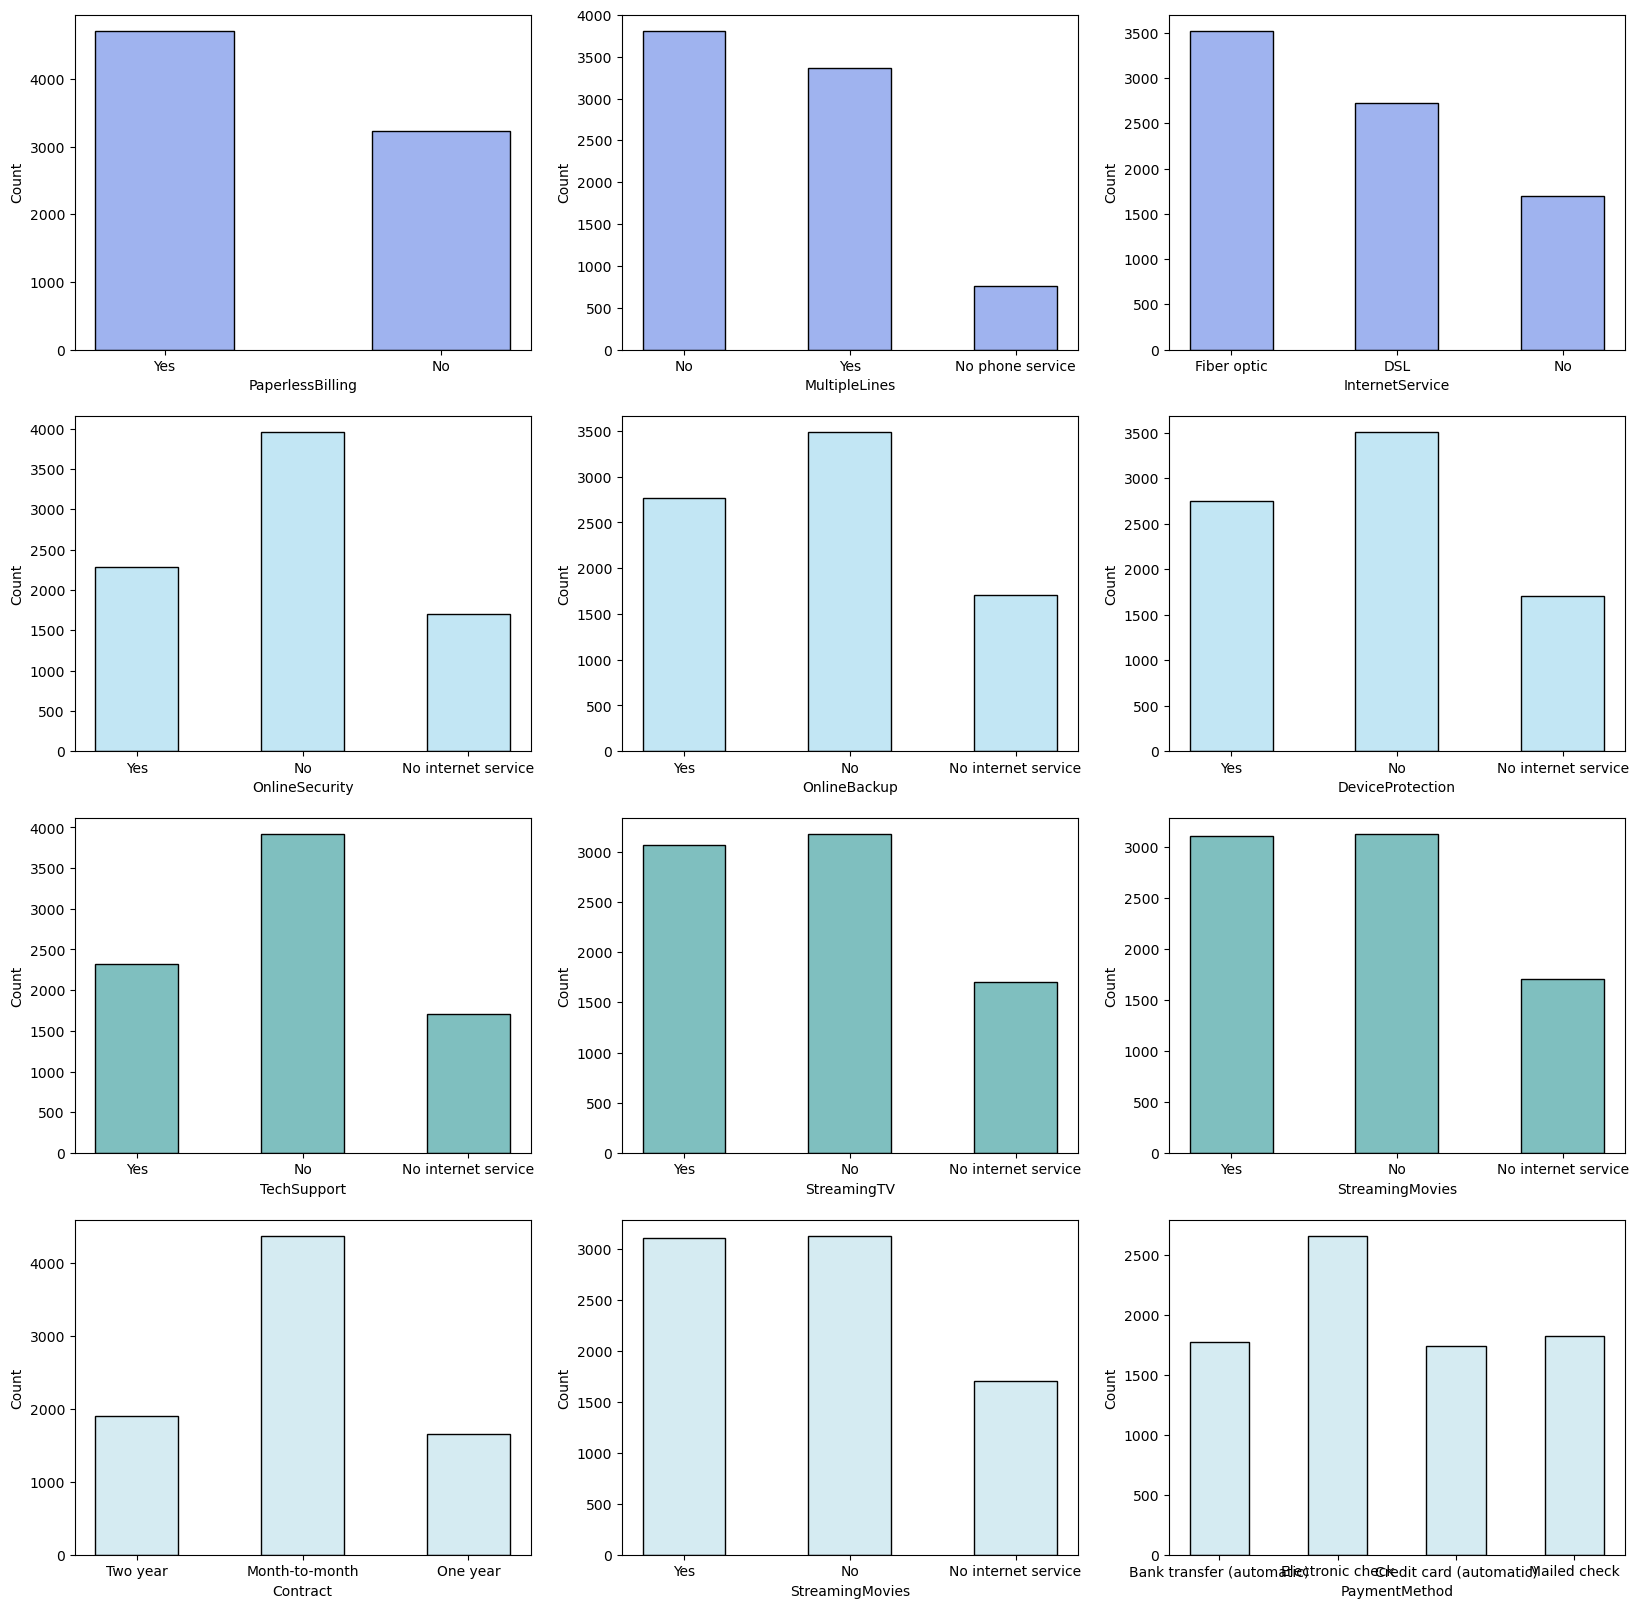

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(20,20))

sns.histplot(data=A2_data, x="PaperlessBilling", shrink=.5, color = 'royalblue', alpha = 0.5, ax=axs[0, 0])
sns.histplot(data=A2_data, x="MultipleLines", shrink=.5, color = 'royalblue', alpha = 0.5, ax=axs[0, 1])
sns.histplot(data=A2_data, x="InternetService", shrink=.5, color = 'royalblue', alpha = 0.5, ax=axs[0, 2])
sns.histplot(data=A2_data, x="OnlineSecurity", shrink=.5, color = 'skyblue', alpha = 0.5, ax=axs[1, 0])
sns.histplot(data=A2_data, x="OnlineBackup", shrink=.5, color = 'skyblue', alpha = 0.5, ax=axs[1, 1])
sns.histplot(data=A2_data, x="DeviceProtection", shrink=.5, color = 'skyblue', alpha = 0.5, ax=axs[1, 2])
sns.histplot(data=A2_data, x="TechSupport", shrink=.5, color = 'teal', alpha = 0.5, ax=axs[2, 0])
sns.histplot(data=A2_data, x="StreamingTV", shrink=.5, color = 'teal', alpha = 0.5, ax=axs[2, 1])
sns.histplot(data=A2_data, x="StreamingMovies", shrink=.5, color = 'teal', alpha = 0.5, ax=axs[2, 2])
sns.histplot(data=A2_data, x="Contract", shrink=.5, color = 'lightblue', alpha = 0.5, ax=axs[3, 0])
sns.histplot(data=A2_data, x="StreamingMovies", shrink=.5, color = 'lightblue', alpha = 0.5, ax=axs[3, 1])
sns.histplot(data=A2_data, x="PaymentMethod", shrink=.5, color = 'lightblue', alpha = 0.5, ax=axs[3, 2])

plt.show()

#https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

In [22]:
### 4.4 Data Cleaning

In [23]:
A2_data['gender'] = A2_data['gender'].map({'Female': 0, 'Male': 1, '': np.nan})
A2_data['Partner'] = A2_data['Partner'].map({'No': 0, 'Yes': 1, '': np.nan})
A2_data['PhoneService'] = A2_data['PhoneService'].map({'No': 0, 'Yes': 1, '': np.nan})
A2_data['PaperlessBilling'] = A2_data['PaperlessBilling'].map({'No': 0, 'Yes': 1, '': np.nan})
A2_data['Churn'] = A2_data['Churn'].map({'No': 0, 'Yes': 1, '': np.nan})
A2_data['Dependents'] = A2_data['Dependents'].map({'No': 0, 'Yes': 1, '': np.nan})
A2_data['MultipleLines'] = A2_data['MultipleLines'].map({'Yes': 2, 'No': 0, 'No phone service':1, ',':np.nan})
A2_data['InternetService'] = A2_data['InternetService'].map({'Fiber optic': 2, 'DSL':1 , 'No':0, ',':np.nan})
A2_data['OnlineSecurity'] = A2_data['OnlineSecurity'].map({'Yes': 2, 'No': 0, 'No internet service':1, ',':np.nan})

A2_data['OnlineBackup'] = A2_data['OnlineBackup'].astype(str)
A2_data['OnlineBackup']= A2_data.apply(lambda x: 1 if 'Yes' in x['OnlineBackup'] \
                                       else (2 if 'No internet service' in x['OnlineBackup'] \
                                             else (0 if 'No' in x['OnlineBackup'] \
                                                   else np.nan)), axis=1)

A2_data['DeviceProtection'] = A2_data['DeviceProtection'].astype(str)
A2_data['DeviceProtection']= A2_data.apply(lambda x: 1 if 'Yes' in x['DeviceProtection'] \
                                           else (2 if 'No internet service' in x['DeviceProtection'] \
                                                 else (0 if 'No' in x['DeviceProtection'] \
                                                       else np.nan)), axis=1)

A2_data['StreamingTV'] = A2_data['StreamingTV'].astype(str)
A2_data['StreamingTV']= A2_data.apply(lambda x: 1 if 'Yes' in x['StreamingTV'] \
                                      else (2 if 'No internet service' in x['StreamingTV'] \
                                            else (0 if 'No' in x['StreamingTV'] \
                                                  else np.nan)), axis=1)

A2_data['StreamingMovies'] = A2_data['StreamingMovies'].astype(str)
A2_data['StreamingMovies']= A2_data.apply(lambda x: 1 if 'Yes' in x['StreamingMovies'] \
                                          else (2 if 'No internet service' in x['StreamingMovies'] \
                                                else (0 if 'No' in x['StreamingMovies'] \
                                                      else np.nan)), axis=1)

A2_data['Contract'] = A2_data['Contract'].astype(str)
A2_data['contract']= A2_data.apply(lambda x: 1 if 'Month-to-month' in x['Contract'] \
                                   else (2 if 'One year' in x['Contract'] \
                                         else (3 if 'Two year' in x['Contract'] \
                                               else np.nan)), axis=1)

A2_data['Geography'] = A2_data['Geography'].astype(str)
A2_data['geography']= A2_data.apply(lambda x: 1 if 'France' in x['Geography'] \
                                    else (2 if 'Germany' in x['Geography'] \
                                          else (3 if 'Spain' in x['Geography'] \
                                                else np.nan)), axis=1)

A2_data['PaymentMethod'] = A2_data['PaymentMethod'].astype(str)
A2_data['PaymentMethod']= A2_data.apply(lambda x: 1 if 'Bank transfer' in x['PaymentMethod'] \
                                        else (2 if 'Credit card' in x['PaymentMethod'] \
                                              else (3 if 'Electronic check' in x['PaymentMethod'] \
                                                    else (4 if 'Mailed' in x['PaymentMethod'] \
                                                          else np.nan)) ) , axis=1)

A2_data['TechSupport'] = A2_data['TechSupport'].astype(str)
A2_data['TechSupport']= A2_data.apply(lambda x: 1 if 'Yes' in x['TechSupport'] \
                                      else (2 if 'No internet service' in x['TechSupport'] \
                                            else (0 if 'No' in x['TechSupport'] \
                                                  else np.nan)), axis=1)

A2_data=A2_data.drop(['OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies',\
                      'Contract','Geography','PaymentMethod','TechSupport'], axis='columns')
A2_data=A2_data.drop_duplicates()
A2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             8000 non-null   int64  
 1   gender            7938 non-null   float64
 2   SeniorCitizen     7954 non-null   float64
 3   Partner           7952 non-null   float64
 4   tenure            7938 non-null   float64
 5   PhoneService      7947 non-null   float64
 6   MultipleLines     7933 non-null   float64
 7   InternetService   7944 non-null   float64
 8   OnlineSecurity    7941 non-null   float64
 9   PaperlessBilling  7952 non-null   float64
 10  TotalCharges      7961 non-null   object 
 11  Churn             7934 non-null   float64
 12  CreditScore       7938 non-null   float64
 13  Surname           7942 non-null   object 
 14  EstimatedSalary   7951 non-null   float64
 15  MonthlyCharges    7968 non-null   float64
 16  customerID        8000 non-null   object 


### 4.5 Data Preparation

In [24]:
# Checking values of Target Variable:
print('Target variable : [Churn]')
A2_data['Churn'].value_counts()

count_stay = len(A2_data[A2_data['Churn']==0])
count_churn = len(A2_data[A2_data['Churn']==1])
pct_of_stay = count_stay/(count_stay+count_churn)
print("percentage of still using the product : ", round(pct_of_stay*100,2),"%")
pct_of_churn = count_churn/(count_stay+count_churn)
print("percentage of people who churned :", round(pct_of_churn*100,2),"%")

# look at the average for both classes
A2_data.groupby('Churn').mean()

# Make a column for grouped Tenure
A2_data['Tenure_Bin'] = pd.cut(A2_data.tenure, bins = 6)
A2_data['Monthly_Bin'] = pd.cut(A2_data.MonthlyCharges, bins = 6)
Tenure_Churn = A2_data.groupby('Tenure_Bin')['Churn'].mean()
Tenure_Churn

Target variable : [Churn]
percentage of still using the product :  73.59 %
percentage of people who churned : 26.41 %


Tenure_Bin
(-0.072, 12.0]    0.475336
(12.0, 24.0]      0.282609
(24.0, 36.0]      0.207082
(36.0, 48.0]      0.184744
(48.0, 60.0]      0.147541
(60.0, 72.0]      0.065066
Name: Churn, dtype: float64

In [25]:
le = preprocessing.LabelEncoder()
A2_data['Tenure_Bin']=le.fit_transform(A2_data['Tenure_Bin'])
A2_data['Monthly_Bin']=le.fit_transform(A2_data['Monthly_Bin'])
A2_data['Tenurexmonthly']=A2_data['Monthly_Bin'].multiply(A2_data['Tenure_Bin'])


A2_data['TotalCharges'] =pd.to_numeric(A2_data['TotalCharges'], errors='coerce').astype('float')
A2_data=A2_data.drop(columns=['customerID','Surname','Index'] )
imp = SimpleImputer(missing_values=np.nan, strategy='median')
A2_imputed=pd.DataFrame(imp.fit_transform(A2_data))
A2_imputed.columns=A2_data.columns

In [26]:
A2_imputed['Churn']=A2_imputed['Churn'].astype(int)

A2_data=A2_imputed

In [27]:
A2_imputed.head(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,PaperlessBilling,TotalCharges,Churn,CreditScore,EstimatedSalary,MonthlyCharges,Dependents,Charge,contract,geography,Tenure_Bin,Monthly_Bin,Tenurexmonthly
0,0.0,0.0,1.0,72.0,1.0,0.0,2.0,2.0,1.0,7679.65,0,602.0,45038.29,108.30,1.0,108.30,3.0,2.0,5.0,5.0,25.0
1,1.0,0.0,1.0,30.0,1.0,2.0,1.0,0.0,0.0,1441.95,0,776.0,89893.60,49.90,0.0,49.90,1.0,2.0,2.0,1.0,2.0
2,1.0,0.0,1.0,49.0,0.0,1.0,1.0,2.0,1.0,1838.15,0,709.0,11.58,39.20,1.0,39.20,1.0,2.0,4.0,1.0,4.0
3,0.0,1.0,1.0,25.0,1.0,2.0,1.0,2.0,1.0,1752.65,0,788.0,116978.19,69.50,0.0,69.50,1.0,1.0,2.0,3.0,6.0
4,0.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,1.0,8333.95,0,733.0,177994.81,114.65,0.0,114.65,3.0,2.0,5.0,5.0,25.0


### 4.6 User Defined Functions (UDFs)

In [28]:
# User defined functions


########################################
# confusion_matrix
########################################
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("""
Normalized confusion matrix""")
#    else:
#        print("""
#Confusion matrix, without normalization""")

#    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Source of function: ML with Python by IBM on Coursera


########################################
# flag_above_average
########################################
def flag_above_average(data, variable):
    """
    This function takes in a dataframe and a variable.
    
    Then, it calculates average of the variable.
    
    Then, it flags any data point that precedes the mean of the variable and
    calls the new variable above_avg_VARIABLE
    
    -----------
    Parameters:
    - DATA: dataframe
    - VARIABLE: column within dataframe
    """
    # Create placeholder for average flag
    data['above_avg_'+variable] = 0
    
    # Instantiate average of variable
    average = data[variable].mean()
    
    # Loop over each column to change its respective flag
    for index, column in data.iterrows():
        
        # Set conditional for variable & upper threshold
        if data.loc[index, variable] > average:
            
            # Change average flag
            data.loc[index, 'above_avg_'+variable] = 1
    
    # Check for any variables with < 100 samples and delete them
    if data['above_avg_'+variable].sum() < 100:
        del data['above_avg_'+variable]
        

########################################
# flag_outliers
########################################
def flag_outliers(data, variable):
    """
    This function takes in a dataframe and a variable.
    
    Then, it calculates the 25th and 75th quantiles of the variable.
    
    Then, it flags 
    
    1) any data point that precedes the 25th quantile under a variable 
    called low_out_VARIABLE.
    
    2) any data point that exceeds the 75th quantile under a variable called
    high_out_variable. 
    
    Then, it deletes any out_VARIABLE with less than 100 samples on either
    side of the flag.
    
    -----------
    Parameters:
    - DATA: dataframe
    - VARIABLE: column within dataframe as string
    """
    # Create placeholder for outlier flag
    data['high_out_'+variable] = 0
    data['low_out_'+variable]  = 0
    
    # Set upper and lower thresholds
    lower_threshold = pd.DataFrame(data.quantile(.25, axis = 0))
    upper_threshold = pd.DataFrame(data.quantile(.75, axis = 0))
    
    # Rename columns for indexing
    lower_threshold.columns = ['LOWER']
    upper_threshold.columns = ['UPPER']
    
    # Loop over each column to change its respective flag
    for index, column in data.iterrows():
        
        # Set conditional for variable & upper threshold
        if data.loc[index, variable] > upper_threshold.loc[variable, 'UPPER']:
            
            # Change outlier flag
            data.loc[index, 'high_out_'+variable] = 1
            
        # Set conditional for variable & lower threshold
        if data.loc[index, variable] < lower_threshold.loc[variable, 'LOWER']:
        
            # Change outlier flag
            data.loc[index, 'low_out_'+variable] = 1
    
    # Check for any variables with < 100 outliers and delete them
    if data['high_out_'+variable].sum() < 100:
        del data['high_out_'+variable]
        
    if data['low_out_'+variable].sum() < 100:
        del data['low_out_'+variable]

        
########################################
# plot_outlier_flags
########################################
def plot_outlier_flags(data, variable):
    """
    This function will take a dataframe and variable and plot the count
    of that variable in a bar plot.
    """
    # Create plot
    ax = data[variable].value_counts().plot(kind     = 'bar',
                                            figsize  = (8,6),
                                            rot      = 0,
                                            colormap = 'Paired')
    
    # Annotate plot with values
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 6),
                    textcoords='offset points')
        
    # Set plot aesthetics
    ax.set_ylabel('# Customers',size = 14)
    ax.set_xlabel('')
    ax.set_title(variable, size = 14)
    
    # Display plot
    plt.show()

## 5 Problem Solving
### 5.1 Correlations

In [29]:
# CROSS_SELL Correlations

# Create correlation dataframe
df_corr = A2_data.corr(method = 'pearson')

# Display correlations with Churn
y_corr = df_corr['Churn'].sort_values(ascending = False)

# Print variables correlated to Y
#y_corr.index
y_corr

Churn               1.000000
InternetService     0.310800
Charge              0.188900
MonthlyCharges      0.187722
PaperlessBilling    0.184178
Monthly_Bin         0.182911
SeniorCitizen       0.147552
MultipleLines       0.032058
EstimatedSalary     0.026431
PhoneService        0.011432
CreditScore         0.011338
geography          -0.012573
gender             -0.013729
Partner            -0.149020
Tenurexmonthly     -0.150337
Dependents         -0.163957
TotalCharges       -0.200480
OnlineSecurity     -0.283640
Tenure_Bin         -0.332104
tenure             -0.351263
contract           -0.393937
Name: Churn, dtype: float64

In [30]:
A2_data.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'Churn',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly']

### 5.2 Feature Selection

In [31]:
# Create feature groups dictionary

features_dict = {
 'logistic'         : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'], 
 'tree'              : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'],           
 'tree_sig'          : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'],
 'forest'            : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'],
 'forest_sig'        :  ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'],    
 'forest_tuned'      : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'],
 'gbm'               : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'],
 'gbm_sig'           : ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly'], 
 'gbm_sig2'          :  ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'PaperlessBilling',
 'TotalCharges',
 'CreditScore',
 'EstimatedSalary',
 'MonthlyCharges',
 'Dependents',
 'Charge',
 'contract',
 'geography',
 'Tenure_Bin',
 'Monthly_Bin',
 'Tenurexmonthly']
}

In [32]:
A2_data.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
PaperlessBilling    float64
TotalCharges        float64
Churn                 int32
CreditScore         float64
EstimatedSalary     float64
MonthlyCharges      float64
Dependents          float64
Charge              float64
contract            float64
geography           float64
Tenure_Bin          float64
Monthly_Bin         float64
Tenurexmonthly      float64
dtype: object

## 5.3 Model Testing

### 5.3.1. Logistic Model



Lenght of oversampled data is 8858

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            4429        0.5
No Churn         4429        0.5


=================== MODEL SUMMARY ===================

Model Type: Logistic Regression

Model Size: 21

---------------------------------

LR Training Score : 0.7455
LR Testing Score  : 0.7125
LR Train-Test Gap : 0.033

LR AUC Score      : 0.7178

---------------------------------

Coefficients:

                  Coefficient
Charge               0.017981
MonthlyCharges       0.015839
Tenurexmonthly       0.007183
InternetService      0.002673
PaperlessBilling     0.001877
MultipleLines        0.001813
SeniorCitizen        0.001740
Monthly_Bin          0.001667
TotalCharges         0.000065
EstimatedSalary      0.000001
gender              -0.000338
Partner             -0.000805
geography           -0.001134
PhoneService        -0.001272
CreditScore         -0.001280
Dependents          -0.0017

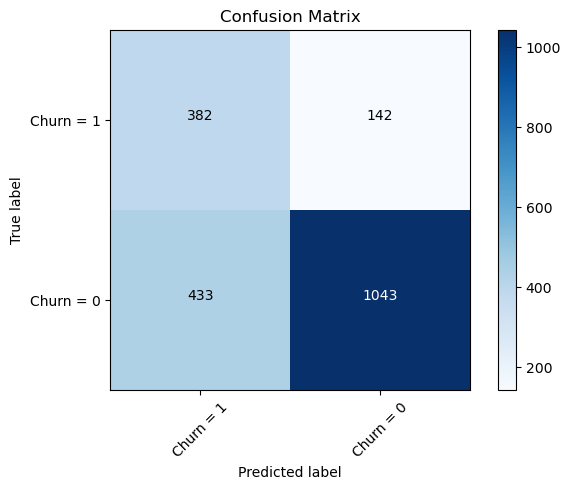

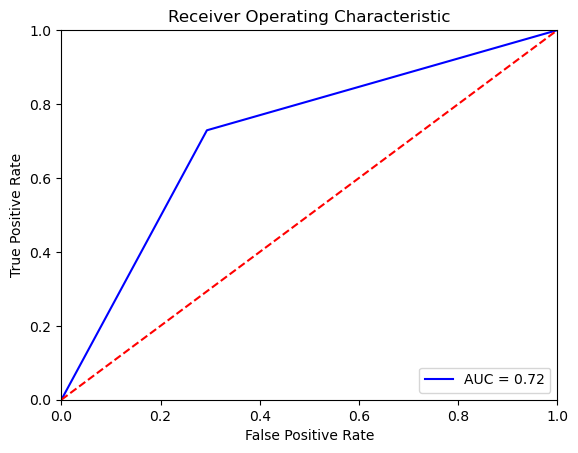

In [33]:
# Base Logistic Model (Variables = LOGISTIC)

# Specify explanatory variables
X = A2_data.loc[:, features_dict['logistic']]

# Specify response variable
y = A2_data.loc[:, 'Churn']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = features_dict['logistic'] )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            {n_cross_sell}        {p_cross_sell}
No Churn         {n_no_cross_sell}        {p_no_cross_sell}
""")


# Instantiate a logistic regression model
LR = LogisticRegression(solver       = 'lbfgs',
                        C            = 1,
                        random_state = 219,
                        max_iter     = 10000)


# Fit the logistic model
LR = LR.fit(os_data_x, os_data_y)

# Predict on test set
LR_pred = LR.predict(X_test)


# Create a dataframe of variable coefficients
lr_coeff = pd.DataFrame(LR.coef_[0], X.columns, columns=['Coefficient'])

# Filter out coefficients that equal 0 and sort by descending
lr_coeff = lr_coeff[lr_coeff['Coefficient'] != 0]\
                    .sort_values('Coefficient', ascending = False)

# Instantiate scores
LR_train_score = LR.score(os_data_x, os_data_y).round(4)
LR_test_score  = LR.score(X_test, y_test).round(4)
LR_test_gap    = abs(LR_test_score - LR_train_score).round(4)
LR_auc_score   = roc_auc_score(y_true  = y_test, y_score = LR_pred).round(4)
LR_report      = classification_report(y_test, 
                                       LR_pred,
                                       target_names = ['Cross Sell Failed (0)',
                                                       'Cross Sell Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Logistic Regression

Model Size: {X.shape[1] + 1}

---------------------------------

LR Training Score : {LR_train_score}
LR Testing Score  : {LR_test_score}
LR Train-Test Gap : {LR_test_gap}

LR AUC Score      : {LR_auc_score}

---------------------------------

Coefficients:

{lr_coeff}
""")


##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
LR_tn, \
LR_fp, \
LR_fn, \
LR_tp = confusion_matrix(y_true = y_test, y_pred = LR_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['Churn = 1','Churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, LR_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

### 5.3.2. Decision Tree



Lenght of oversampled data is 8858

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            4429        0.5
No Churn         4429        0.5


=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: 21

---------------------------------

Decision Tree Training Score : 0.7772
Decision Tree Testing Score  : 0.7235
Decision Tree Test-Gap       : 0.0537
Decision Tree AUC Score      : 0.745

---------------------------------




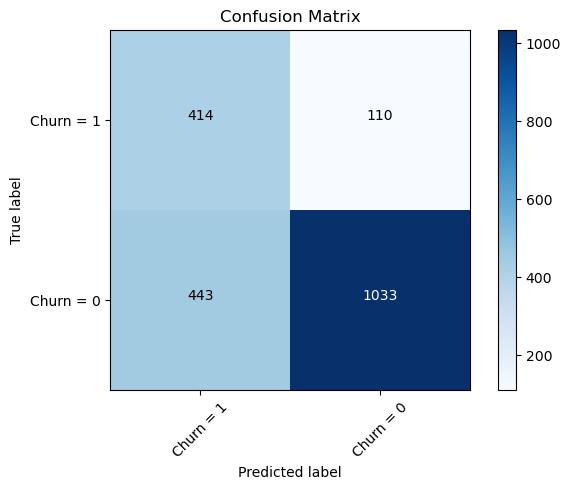

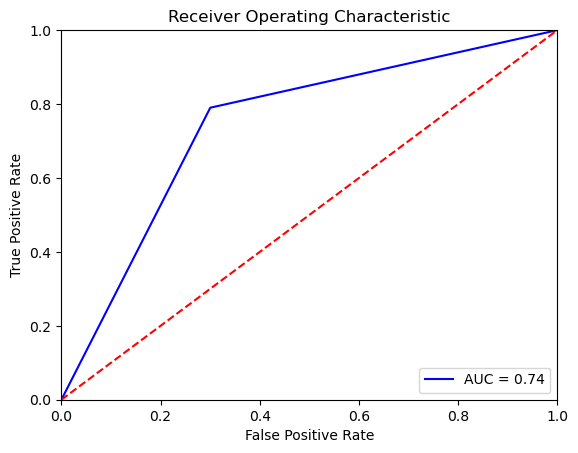

In [34]:
# Base Tree Model (Variables = TREE_SIG)

# Specify explanatory variables
X = A2_data.loc[:, features_dict['tree_sig']]

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X)

# Transform explanatory variables
X_scaled = scaler.transform(X)
    
    
# Specify response variable
y = A2_data.loc[:, 'Churn']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)  

# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = features_dict['tree_sig'] )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            {n_cross_sell}        {p_cross_sell}
No Churn         {n_no_cross_sell}        {p_no_cross_sell}
""")


# Instantiate a classification tree object
baseTree = DecisionTreeClassifier(criterion = 'gini',
                                  splitter  = 'best',
                                  max_depth = 4,
                                  min_samples_leaf = 25,
                                  random_state = 219)

# Fit the training data
baseTree = baseTree.fit(os_data_x.values, os_data_y)


# Predict Churning
baseTree_pred = baseTree.predict(X_test)


# Reassign column names
os_data_x = pd.DataFrame(os_data_x, columns = column_names)


#####################
# Save scores
baseTree_train_score = baseTree.score(os_data_x.values, os_data_y).round(4) # accuracy
baseTree_test_score  = baseTree.score(X_test, y_test).round(4)   # accuracy
baseTree_test_gap    = abs(baseTree_test_score - baseTree_train_score).round(4)
baseTree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = baseTree_pred).round(4) # auc
baseTree_report      = classification_report(y_test, 
                                             baseTree_pred,
                                             target_names = [
                                                 'Cross Sell Failed (0)',
                                                 'Cross Sell Successful (1)'])

#####################
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: {X.shape[1] + 1}

---------------------------------

Decision Tree Training Score : {baseTree_train_score}
Decision Tree Testing Score  : {baseTree_test_score}
Decision Tree Test-Gap       : {baseTree_test_gap}
Decision Tree AUC Score      : {baseTree_auc_score}

---------------------------------

""")

##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
baseTree_tn, \
baseTree_fp, \
baseTree_fn, \
baseTree_tp = confusion_matrix(y_true = y_test, y_pred = baseTree_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, baseTree_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['Churn = 1','Churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = baseTree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, baseTree_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

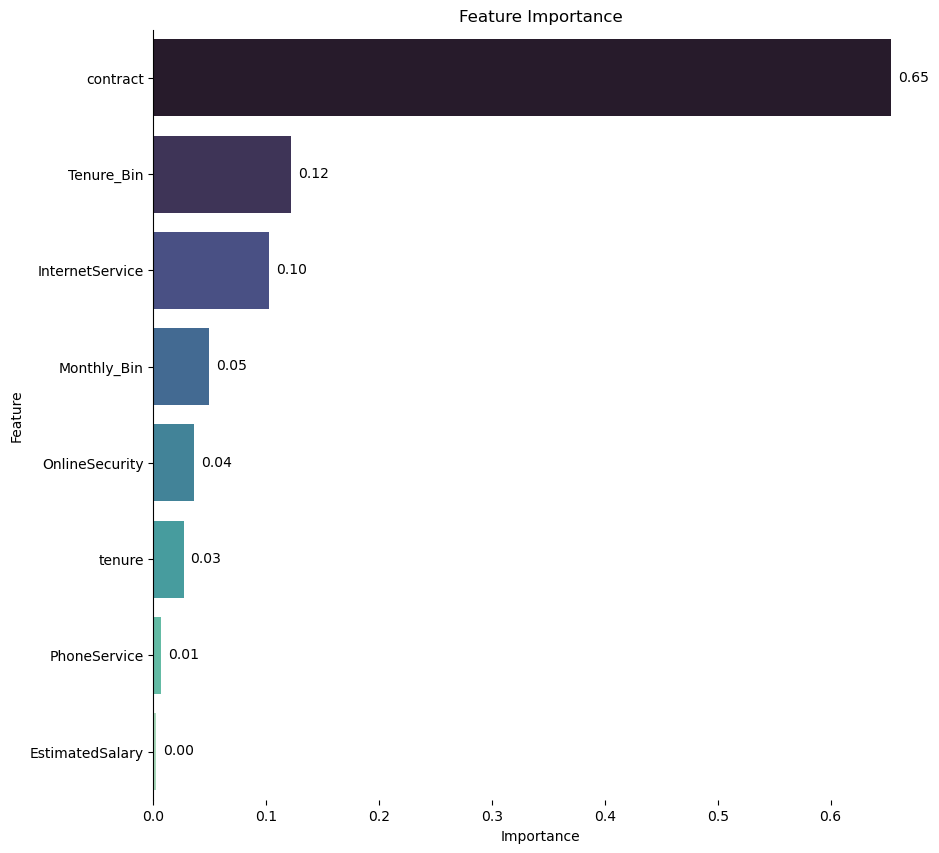

In [35]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(baseTree.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

### 5.3.3. Random Forest



Lenght of oversampled data is 8858

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            4429        0.5
No Churn         4429        0.5


=================== MODEL SUMMARY ===================

Model Type: Random Forest

Model Size: 21

---------------------------------

RF Training Score : 0.8594
RF Testing Score  : 0.7695
RF Train-Test Gap : 0.0899

RF AUC Score      : 0.7571

---------------------------------


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1476
           1       0.54      0.73      0.62       524

    accuracy                           0.77      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.80      0.77      0.78      2000



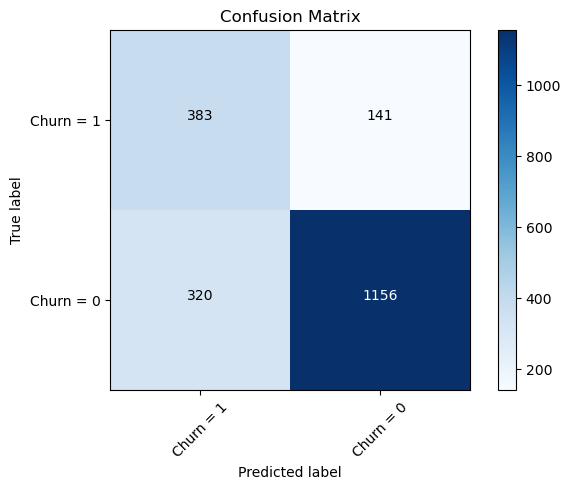

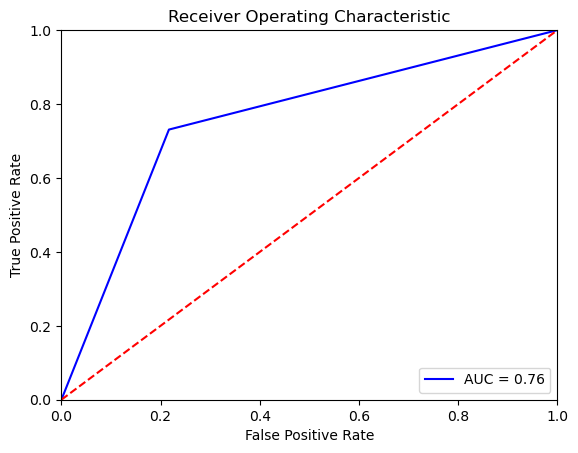

In [36]:
# Base Random Forest (Variables = FOREST)


##############################################################################
# Prepare data

# Specify explanatory variables
X = A2_data.loc[:, features_dict['forest']]

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X)

# Transform explanatory variables
X_scaled = scaler.transform(X)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y) 

# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = features_dict['forest'] )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            {n_cross_sell}        {p_cross_sell}
No Churn         {n_no_cross_sell}        {p_no_cross_sell}
""")

# Reassign column names
os_data_x = pd.DataFrame(os_data_x.values, columns = column_names)

##############################################################################
# Create Model

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 1000,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default = rf_default.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
rf_default_pred = rf_default.predict(X_test)


# Instantiate scores
rf_train_score = rf_default.score(os_data_x.values, os_data_y).round(4)
rf_test_score  = rf_default.score(X_test, y_test).round(4)
rf_test_gap    = abs(rf_test_score - rf_train_score).round(4)
rf_auc_score   = roc_auc_score(y_true  = y_test, y_score = rf_default_pred).round(4)
rf_report      = classification_report(y_test, 
                                       rf_default_pred,
                                       target_names = ['Cross Sell Failed (0)',
                                                       'Cross Sell Successful (1)'])
# Print results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Random Forest

Model Size: {X.shape[1] + 1}

---------------------------------

RF Training Score : {rf_train_score}
RF Testing Score  : {rf_test_score}
RF Train-Test Gap : {rf_test_gap}

RF AUC Score      : {rf_auc_score}

---------------------------------

""")


##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_default_pred, labels=[1,0])
print(classification_report(y_test, rf_default_pred))
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['Churn = 1','Churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = rf_default.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_default_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

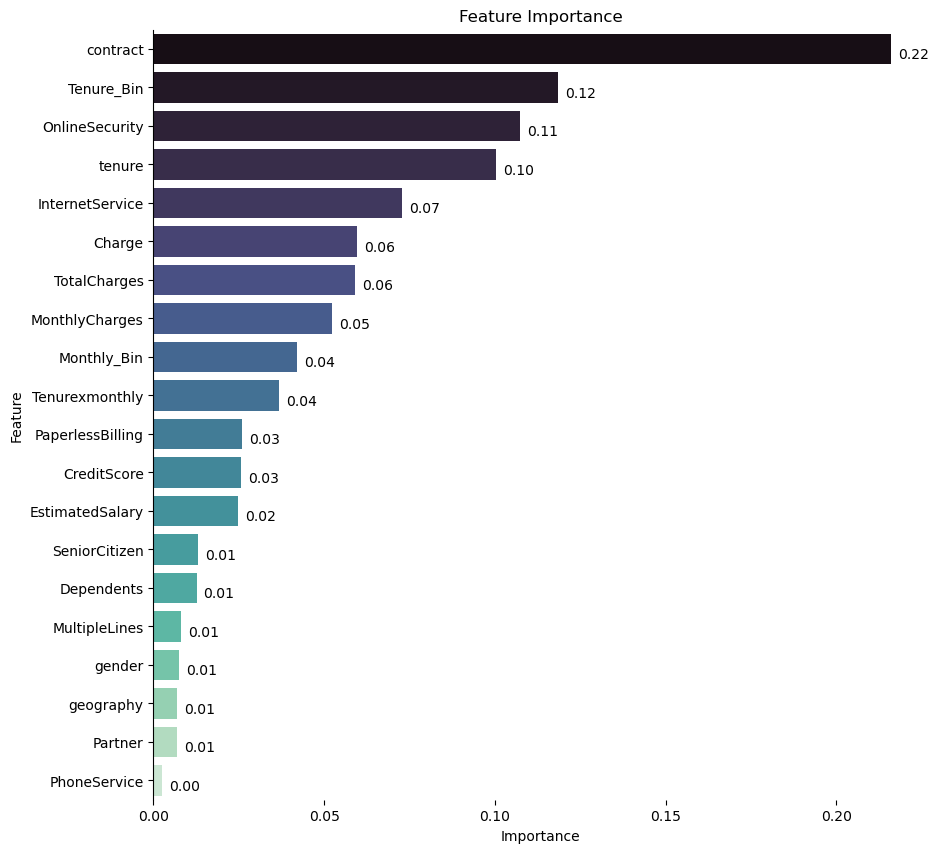

In [37]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(rf_default.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

### 5.3.4. Tuned Random Forest



Lenght of oversampled data is 8858

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            4429        0.5
No Churn         4429        0.5



C:\Users\eunic\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1476
           1       0.79      0.61      0.69       524

    accuracy                           0.85      2000
   macro avg       0.83      0.78      0.80      2000
weighted avg       0.85      0.85      0.85      2000


=================== MODEL SUMMARY ===================

Model Type: Random Forest Tuned

Model Size: 21

---------------------------------

Tuned Forest Training Score : 0.7394
Tuned Forest Testing Score  : 0.855
Tuned Forest Train-Test Gap : 0.1156

Tuned Forest AUC Score      : 0.7774

---------------------------------




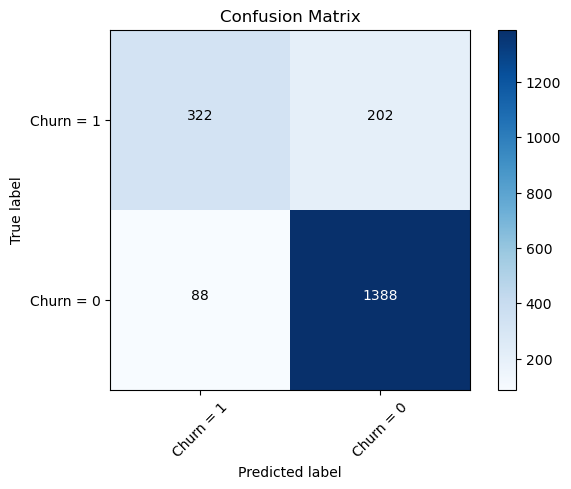

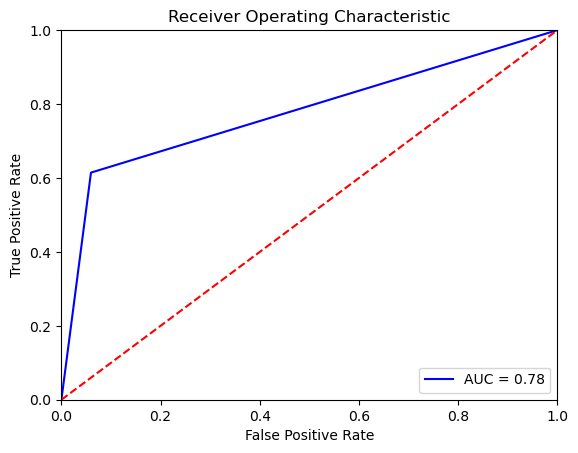

In [38]:
# Tuned Random Forest (Variables = GBM_SIG2)

##############################################################################
# Prepare data

# Specify explanatory variables
X = A2_data.loc[:, features_dict['gbm_sig2']]

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X.values)

# Transform explanatory variables
X_scaled = scaler.transform(X.values)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)    


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = features_dict['gbm_sig2'] )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            {n_cross_sell}        {p_cross_sell}
No Churn         {n_no_cross_sell}        {p_no_cross_sell}
""")

##############################################################################
# Tune Hyperparameters

# declaring a hyperparameter space
estimator_space  = np.arange(140, 180, 10)
criterion_space  = ['gini', 'entropy']
depth_space      = np.arange(5, 9, 1)
#leaf_space       = np.arange(1, 10, 1)
bootstrap_space  = [True, False]
warm_start_space = [True, False]
#split_space      = np.arange(1, 525, 25)
#features_space   = np.arange(1, 14, 1)


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'criterion'        : criterion_space,
              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv           = 3,
                               n_iter       = 10,
                               random_state = 219,
                               scoring      = make_scorer(roc_auc_score,
                                              needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(X.values, y)


# PREDICT step is not needed


##############################################################################
# Create tuned model

# Instantiate model
rf_tuned = forest_cv.best_estimator_


# Fit the  model
rf_tuned = rf_tuned.fit(os_data_x.values, os_data_y)


# Predict on test set
rf_tuned_pred = rf_tuned.predict(X_test)
print(classification_report(y_test, rf_tuned_pred))

# Reassign column names
os_data_x = pd.DataFrame(os_data_x.values, columns = column_names)


# Instantiate scores
rf_tuned_train_score = rf_tuned.score(os_data_x.values, os_data_y).round(4)
rf_tuned_test_score  = rf_tuned.score(X_test, y_test).round(4)
rf_tuned_test_gap    = abs(rf_tuned_test_score - rf_tuned_train_score).round(4)
rf_tuned_auc_score   = roc_auc_score(y_true  = y_test, y_score = rf_tuned_pred).round(4)
rf_tuned_report      = classification_report(y_test, 
                                       rf_tuned_pred,
                                       target_names = ['Cross Sell Failed (0)',
                                                       'Cross Sell Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Random Forest Tuned

Model Size: {X.shape[1] + 1}

---------------------------------

Tuned Forest Training Score : {rf_tuned_train_score}
Tuned Forest Testing Score  : {rf_tuned_test_score}
Tuned Forest Train-Test Gap : {rf_tuned_test_gap}

Tuned Forest AUC Score      : {rf_tuned_auc_score}

---------------------------------

""")


##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
rf_tuned_tn, \
rf_tuned_fp, \
rf_tuned_fn, \
rf_tuned_tp = confusion_matrix(y_true = y_test, y_pred = rf_tuned_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_tuned_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['Churn = 1','Churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = rf_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_tuned_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

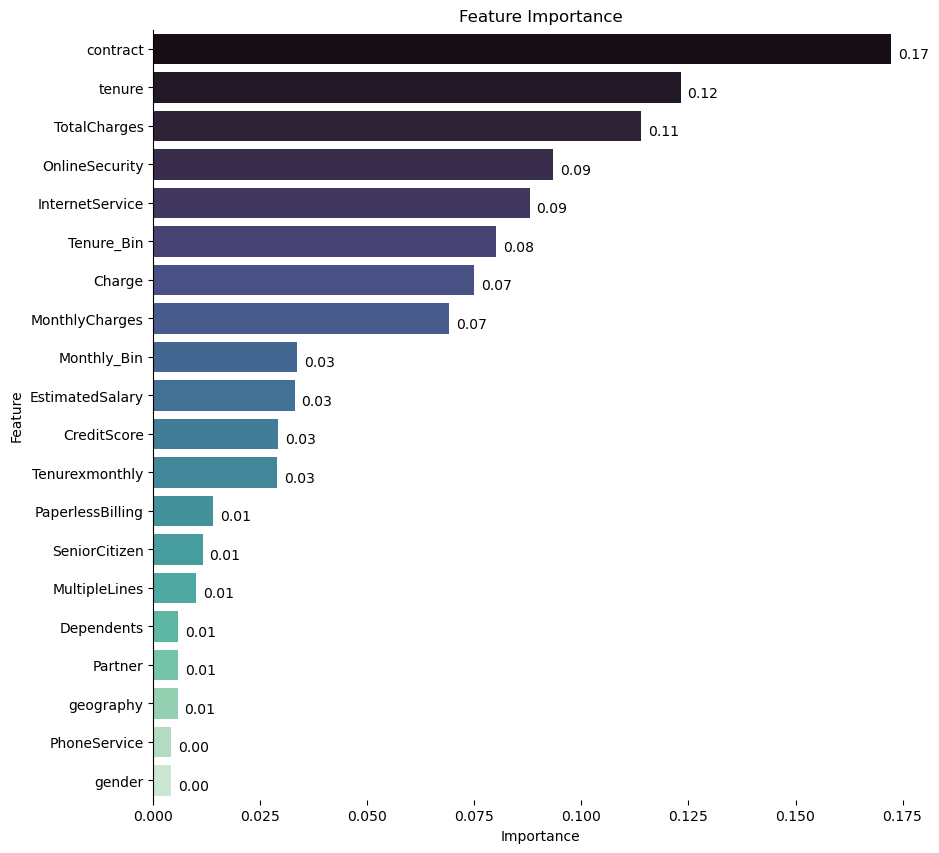

In [39]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(rf_tuned.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

### 5.3.5. Gradient Boosted Machines (GBM)



Lenght of oversampled data is 8858

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            4429        0.5
No Churn         4429        0.5

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1476
           1       0.63      0.60      0.62       524

    accuracy                           0.80      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.80      0.80      0.80      2000


=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: 21

---------------------------------

GBM Training Score : 0.8745
GBM Testing Score  : 0.803
GBM Train-Test Gap : 0.0715

GBM AUC Score      : 0.7385

---------------------------------




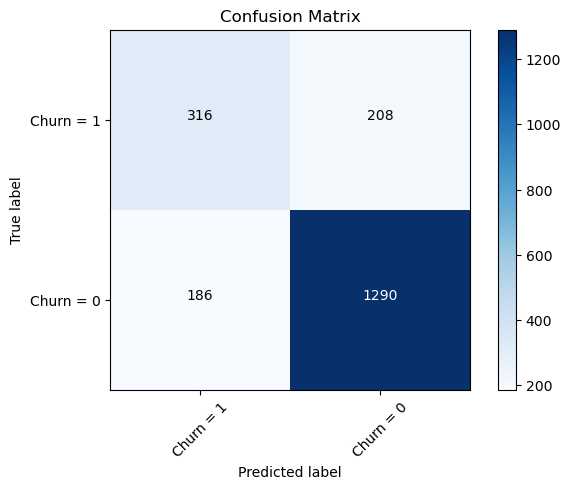

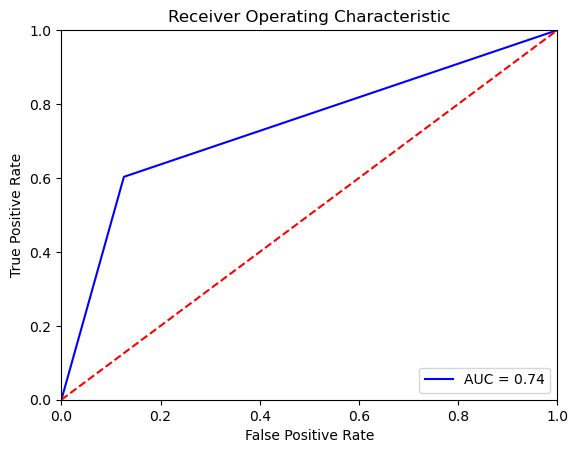

In [40]:
# GBM Model


##############################################################################
# Prepare data

# Specify explanatory variables
X = A2_data.loc[:, features_dict['gbm_sig2']]

# Specify response variable
y = A2_data.loc[:, 'Churn']


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = features_dict['gbm_sig2'] )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn            {n_cross_sell}        {p_cross_sell}
No Churn         {n_no_cross_sell}        {p_no_cross_sell}
""")


##############################################################################
# Create model

# INSTANTIATING the model object without hyperparameters
gbm_default = GradientBoostingClassifier(
                                         learning_rate = 0.1,
                                         n_estimators  = 100,
                                         criterion     = 'friedman_mse',
                                         max_depth     = 3,
                                         warm_start    = False,
                                         random_state  = 219)

# FIT step is needed as we are not using .best_estimator
gbm_default = gbm_default.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_default_pred = gbm_default.predict(X_test)
print(classification_report(y_test,gbm_default_pred))

# Instantiate scores
gbm_default_train_score = gbm_default.score(os_data_x.values, os_data_y).round(4)
gbm_default_test_score  = gbm_default.score(X_test, y_test).round(4)
gbm_default_test_gap    = abs(gbm_default_test_score - gbm_default_train_score).round(4)
gbm_default_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_default_pred).round(4)
gbm_default_report      = classification_report(y_test, 
                                       gbm_default_pred,
                                       target_names = ['Cross Sell Failed (0)',
                                                       'Cross Sell Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: {X.shape[1] + 1}

---------------------------------

GBM Training Score : {gbm_default_train_score}
GBM Testing Score  : {gbm_default_test_score}
GBM Train-Test Gap : {gbm_default_test_gap}

GBM AUC Score      : {gbm_default_auc_score}

---------------------------------

""")


##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = gbm_default_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, gbm_default_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['Churn = 1','Churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_default.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_default_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

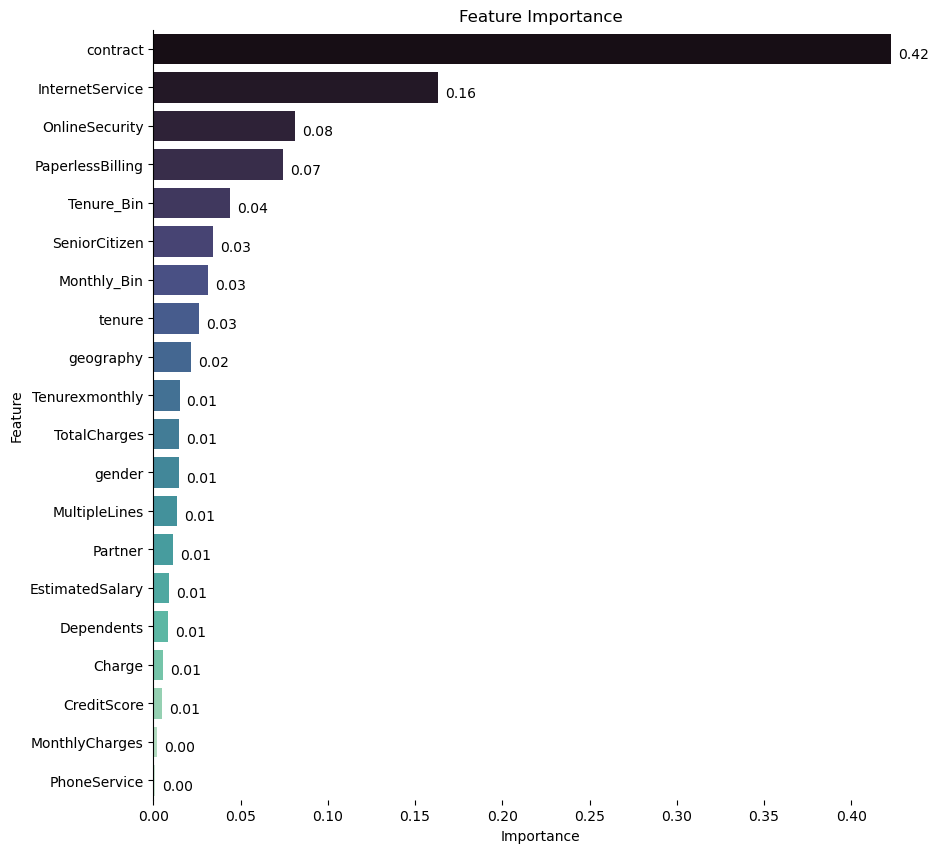

In [41]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_default.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [43]:
gbm_default

GradientBoostingClassifier(random_state=219)

### 5.3.6. Tuned Gradient Boosted Machines (GBM)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1476
           1       0.90      0.80      0.85       524

    accuracy                           0.93      2000
   macro avg       0.92      0.89      0.90      2000
weighted avg       0.93      0.93      0.92      2000


=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: 21

---------------------------------

Tuned GBM Training Score : 0.801
Tuned GBM Testing Score  : 0.926
Tuned GBM Train-Test Gap : 0.125

Tuned GBM AUC Score      : 0.8865

---------------------------------




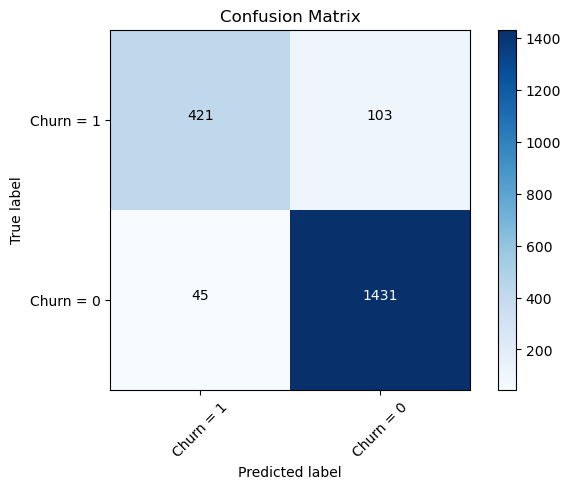

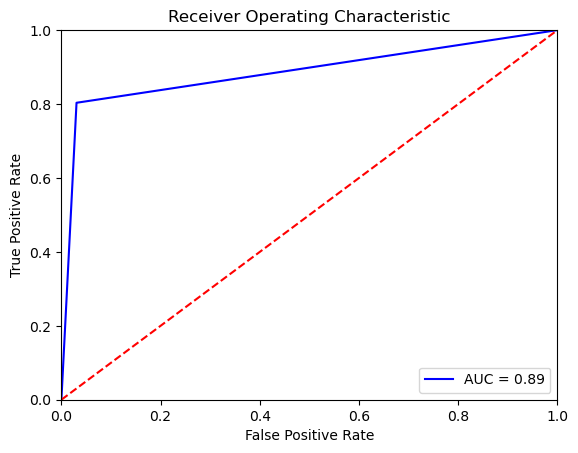

In [44]:
# GBM Tuned

# declaring a hyperparameter space
learn_space        = np.arange(0.1, 3.0, 0.1)
estimator_space    = np.arange(120, 150, 10)
depth_space        = np.arange(3, 5, 1)
warm_start_space   = [True, False]

#min_split_space    = np.arange(2, 400, 100)
#max_features_space = ['auto', 'sqrt', 'log2']
#loss_space         = ['deviance', 'exponential']
#criterion_space    = ['friedman_mse', 'mse', 'mae']

# creating a hyperparameter grid
param_grid = {'learning_rate'     : learn_space,
              'n_estimators'      : estimator_space,
              'max_depth'         : depth_space,
#              'min_samples_split' : min_split_space,
#              'max_features'      : max_features_space,
#              'loss'              : loss_space,
#              'criterion'         : criterion_space,
              'warm_start'        : warm_start_space}

# INSTANTIATING the model object without hyperparameters
gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
gbm_cv = RandomizedSearchCV(estimator          = gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
gbm_cv.fit(X.values, y)


##############################################################################
# Create tuned model

# Instantiate a logistic regression model
gbm_tuned = gbm_cv.best_estimator_

# FIT step is needed as we are not using .best_estimator
gbm_tuned = gbm_tuned.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(X_test)
print(classification_report(y_test,gbm_tuned_pred))

# Instantiate scores
gbm_tuned_train_score = gbm_tuned.score(os_data_x.values, os_data_y).round(4)
gbm_tuned_test_score  = gbm_tuned.score(X_test, y_test).round(4)
gbm_tuned_test_gap    = abs(gbm_tuned_test_score - gbm_tuned_train_score).round(4)
gbm_tuned_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_tuned_pred).round(4)
gbm_tuned_report      = classification_report(y_test, 
                                       gbm_tuned_pred,
                                       target_names = ['Cross Sell Failed (0)',
                                                       'Cross Sell Successful (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: {X.shape[1] + 1}

---------------------------------

Tuned GBM Training Score : {gbm_tuned_train_score}
Tuned GBM Testing Score  : {gbm_tuned_test_score}
Tuned GBM Train-Test Gap : {gbm_tuned_test_gap}

Tuned GBM AUC Score      : {gbm_tuned_auc_score}

---------------------------------

""")


##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, gbm_tuned_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['Churn = 1','Churn = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_tuned_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

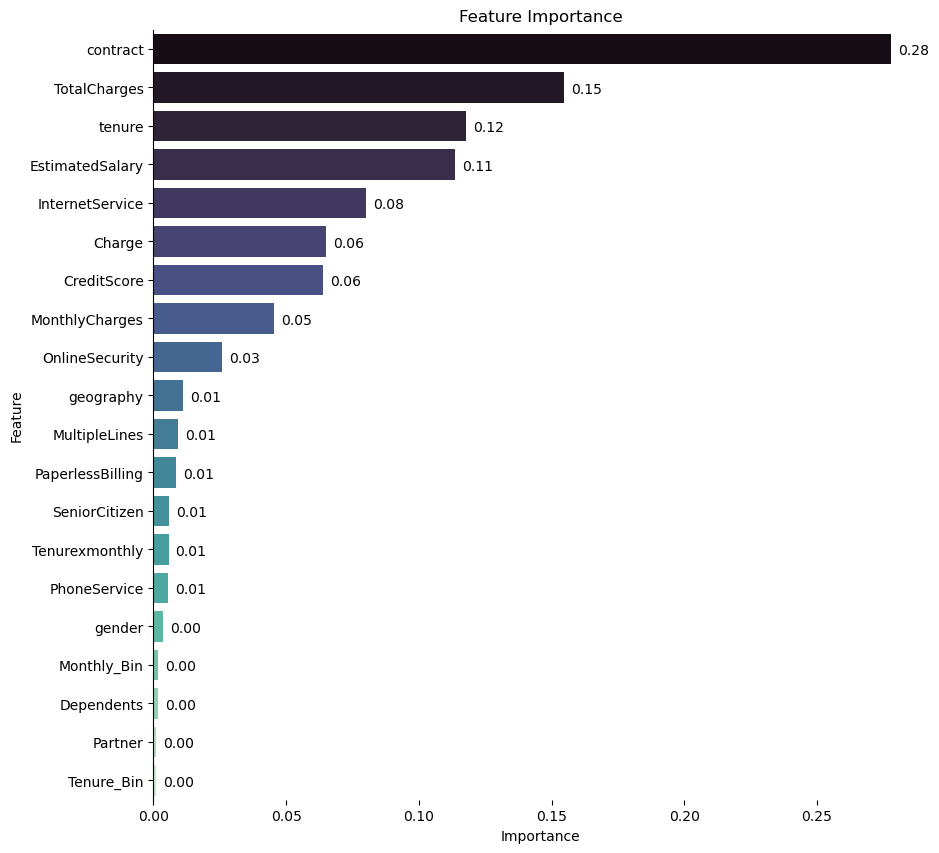

In [45]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_tuned.feature_importances_, X.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## 6 Model Comparison

In [46]:
# Print end result

# Time of script
t1 = time.time()

script_time = round((t1-t0)/60, 2)

# Compare results
print(f"""

======================================== Model Comparison ========================================



Model           Train Acc.   Test Acc.     Gap         AUC Score    TN,  FP, FN,  TP
-----           ----------   ---------     ------      ---------    ----------------
Logistic        {LR_train_score}       {LR_test_score}        {LR_test_gap}       {LR_auc_score}       {LR_tn, LR_fp, LR_fn, LR_tp}
Decision Tree   {baseTree_train_score}       {baseTree_test_score}        {baseTree_test_gap}       {baseTree_auc_score}        {baseTree_tn, baseTree_fp, baseTree_fn, baseTree_tp}
Random Forest   {rf_train_score}       {rf_test_score}          {rf_test_gap}      {rf_auc_score}       {rf_tn, rf_fp, rf_fn, rf_tp}
Tuned RF        {rf_tuned_train_score}       {rf_tuned_test_score}        {rf_tuned_test_gap}      {rf_tuned_auc_score}       {rf_tuned_tn, rf_tuned_fp, rf_tuned_fn, rf_tuned_tp}
GBM             {gbm_default_train_score}       {gbm_default_test_score}        {gbm_default_test_gap}      {gbm_default_auc_score}       {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned GBM       {gbm_tuned_train_score}       {gbm_tuned_test_score}        {gbm_tuned_test_gap}      {gbm_tuned_auc_score}       {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}         



     /-----------------------------------------------------------------------------------\\
     | Tuned GBM is the best model with an AUC of {gbm_tuned_auc_score} and a train-test gap of {gbm_tuned_test_gap}.  |
     \\-----------------------------------------------------------------------------------/


""")

# Tuned LR      {LR_tuned_test_gap}              {LR_tuned_auc_score}          {LR_tuned_tn, LR_tuned_fp, LR_tuned_fn, LR_tuned_tp}
# Tuned Tree    {tree_tuned_test_gap}              {tree_tuned_auc_score}         {tree_tuned_tn, tree_tuned_fp, tree_tuned_fn, tree_tuned_tp}



print(f"""

Total script run time: {script_time} minutes

""")



======================================== Model Comparison ========================================



Model           Train Acc.   Test Acc.     Gap         AUC Score    TN,  FP, FN,  TP
-----           ----------   ---------     ------      ---------    ----------------
Logistic        0.7455       0.7125        0.033       0.7178       (1043, 433, 142, 382)
Decision Tree   0.7772       0.7235        0.0537       0.745        (1033, 443, 110, 414)
Random Forest   0.8594       0.7695          0.0899      0.7571       (1156, 320, 141, 383)
Tuned RF        0.7394       0.855        0.1156      0.7774       (1388, 88, 202, 322)
GBM             0.8745       0.803        0.0715      0.7385       (1290, 186, 208, 316)
Tuned GBM       0.801       0.926        0.125      0.8865       (1431, 45, 103, 421)         



     /-----------------------------------------------------------------------------------\
     | Tuned GBM is the best model with an AUC of 0.8865 and a train-test gap of 0.125.

## 7 Additional Statistics for the Recommendation

Descriptive Statistics for the Top 5 variables affecting the model.
- Contract
- Total Charges
- Tenure
- Estimated Salary
- Internet Service

In [47]:
# Churn: Numerical to Categorical
A2_data['Churn'] = A2_data['Churn'].map({0:'No', 1:'Yes', '': np.nan})

In [48]:
dscriptive = A2_data[['contract','TotalCharges','tenure','EstimatedSalary','InternetService']]
dscriptive.describe()

,contract,TotalCharges,tenure,EstimatedSalary,InternetService
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.685750,2283.450688,32.361125,100379.527000,1.227875
std,0.832667,2262.698316,24.498592,57437.831764,0.775418
min,1.000000,18.800000,0.000000,11.580000,0.000000
25%,1.000000,405.675000,9.000000,51113.055000,1.000000
50%,1.000000,1404.650000,29.000000,100556.980000,1.000000
75%,2.000000,3778.025000,55.000000,149068.075000,2.000000
max,3.000000,8684.800000,72.000000,199992.480000,2.000000


Text(0, 0.5, 'Frequency')

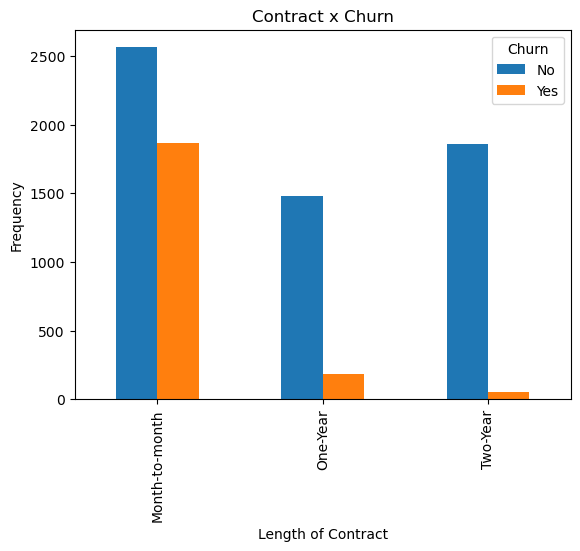

In [49]:
# Contract
A2_data['Contract_Data'] = A2_data['contract'].map({1:'Month-to-month', 2:'One-Year', 3:'Two-Year', '': np.nan})

%matplotlib inline
pd.crosstab(A2_data.Contract_Data,A2_data.Churn).plot(kind='bar')

plt.title('Contract x Churn')
plt.xlabel('Length of Contract')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

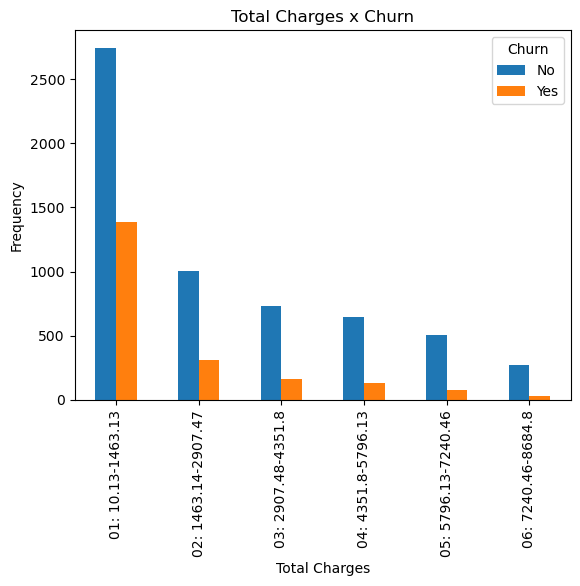

In [50]:
# Total Charges
# Make a column for grouped tenure
A2_data['Charges_Bin'] = pd.cut(A2_data.TotalCharges, bins = 6, labels=['01: 10.13-1463.13','02: 1463.14-2907.47',\
                                                                 '03: 2907.48-4351.8','04: 4351.8-5796.13',\
                                                                 '05: 5796.13-7240.46','06: 7240.46-8684.8'])

pd.crosstab(A2_data.Charges_Bin,A2_data.Churn).plot(kind='bar')

plt.title('Total Charges x Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

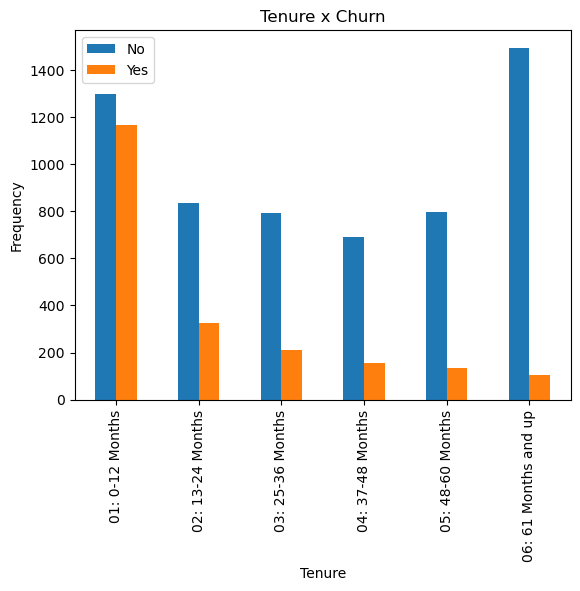

In [51]:
# Tenure
# Make a column for grouped tenure
A2_data['Tenure_Bin'] = pd.cut(A2_data.tenure, bins = 6, labels=['01: 0-12 Months','02: 13-24 Months',\
                                                                 '03: 25-36 Months','04: 37-48 Months',\
                                                                 '05: 48-60 Months','06: 61 Months and up'])

pd.crosstab(A2_data.Tenure_Bin,A2_data.Churn).plot(kind='bar')

plt.legend(["No", "Yes"])
plt.title('Tenure x Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

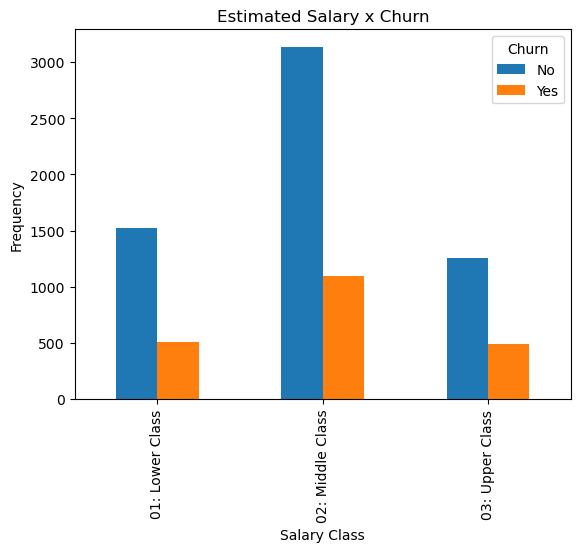

In [52]:
# Salary
A2_data['Salary_Bin'] = A2_data['EstimatedSalary'].apply(lambda x: '03: Upper Class' if x > 156000 \
                                                         else ('02: Middle Class' if x > 52000 else '01: Lower Class'))

pd.crosstab(A2_data.Salary_Bin,A2_data.Churn).plot(kind='bar')

plt.title('Estimated Salary x Churn')
plt.xlabel('Salary Class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

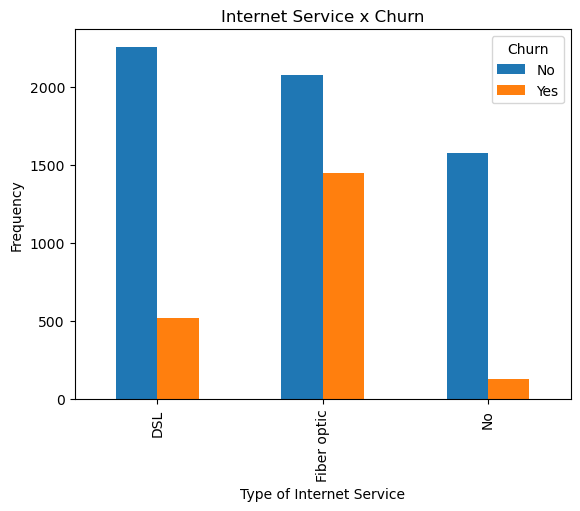

In [53]:
# Internet Service
A2_data['Internet'] = A2_data['InternetService'].map({2: 'Fiber optic', 1: 'DSL' , 0:'No', '': np.nan})

pd.crosstab(A2_data.Internet,A2_data.Churn).plot(kind='bar')

plt.title('Internet Service x Churn')
plt.xlabel('Type of Internet Service')
plt.ylabel('Frequency')

In [54]:
gbm_tuned

GradientBoostingClassifier(learning_rate=0.9, n_estimators=140,
                           random_state=219, warm_start=True)